

### <font color='##08a22a'>*Comparar el efecto de diferentes escaladores en los datos con valores atípicos*</font> [Link](<https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py>)

****Author:  Raghav RV rvraghav93@gmail.com****  
****Guillaume Lemaitre g.lemaitre58@gmail.com****  
****Thomas Unterthiner****  
****License: BSD 3 clause****  


### <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
### Tasca M5 T02 Comparación:   
### Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.
#### Juan Javier Hidalgo Gómez

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#from sklearn.datasets import fetch_california_housing

import warnings
warnings.filterwarnings('ignore')
from colorama import init, Fore, Back, Style
from sklearn.model_selection import train_test_split

#Ejemplo Sprint 05
#Variables genéricas:
path=r'C:\Users\Nitropc\IT Academy\Data Science\DS_Sprint_05\Fuente de Datos\housing data.csv'
#data = pd.read_csv(path,sep=',',encoding='ISO-8859-1')
data = pd.read_csv(path,sep=',',encoding='latin-1',header=None)
data.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

dataset = pd.DataFrame(data)
#Original
#dataset = fetch_california_housing()



# Creamos nuestro dataset de Train y Test
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
target = ['MEDV']
#features = columnas
#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7 y RM que parecia
#una distribución normal

x = dataset.loc[:, features]
#target 
y = dataset.loc[:, target]
    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 42) 


X_full, y_full = X_train, y_train

X_full=X_full.to_numpy()
y_full=y_full.to_numpy()
#feature_names = dataset.feature_names
feature_names = list(dataset.columns.values)
#print(type(features))

#Nuestro ejemplo
feature_mapping = {
    "CRIM": "Tasa de criminalidad per cápita por ciudad",
    "ZN": "Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados",
    "INDUS": "Proporción de acres comerciales no minoristas por ciudad",
    "CHAS": "Variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)",
    "NOX": "Concentración de óxidos nítricos (partes por 10 millones)",
    "RM": "Número promedio de cuartos por vivienda",
    "AGE": "Proporción de unidades ocupadas por propietarios construidas antes de 1940",
    "DIS": "Distancias ponderadas a cinco centros de empleo",
    "RAD": "Índice de accesibilidad a las carreteras radiales",
    "TAX": "Tasa de impuestos sobre la propiedad de valor total por cada $10,000",
    "PTRATIO": "Ratio alumno-profesor por localidad",
    "B": "1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad",
    "LSTAT": "% estado más bajo de la población",
    "MEDV": "Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares",
}

#Original
#feature_mapping = {
#    "MedInc": "Median income in block",
#    "HousAge": "Median house age in block",
#    "AveRooms": "Average number of rooms",
#    "AveBedrms": "Average number of bedrooms",
#    "Population": "Block population",
#    "AveOccup": "Average house occupancy",
#    "Latitude": "House block latitude",
#    "Longitude": "House block longitude",
#}
# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
# Original
#features = ["MedInc", "AveOccup"]


#Original
#features_idx = [feature_names.index(feature) for feature in features]
#X = X_full[:, features_idx]


# Nos permite cambiar los atributos que vamos análizar:

features = ["RM","MEDV"]

features_idx = [feature_names.index(feature) for feature in features]

X = X_full[:, features_idx]



distributions = [
    ("Datos originales", X),
    ("Data after Escalador estándar (StandardScaler)", StandardScaler().fit_transform(X)),
    ("Data after MinMaxScaler", MinMaxScaler().fit_transform(X)),
    ("Data after MaxAbsScaler", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(output_distribution="uniform").fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(output_distribution="normal").fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )


In [6]:
print(Style.BRIGHT +'Introducir en make_plot de 0 a 9:'+Style.RESET_ALL)

Introducir en make_plot de 0 a 9:


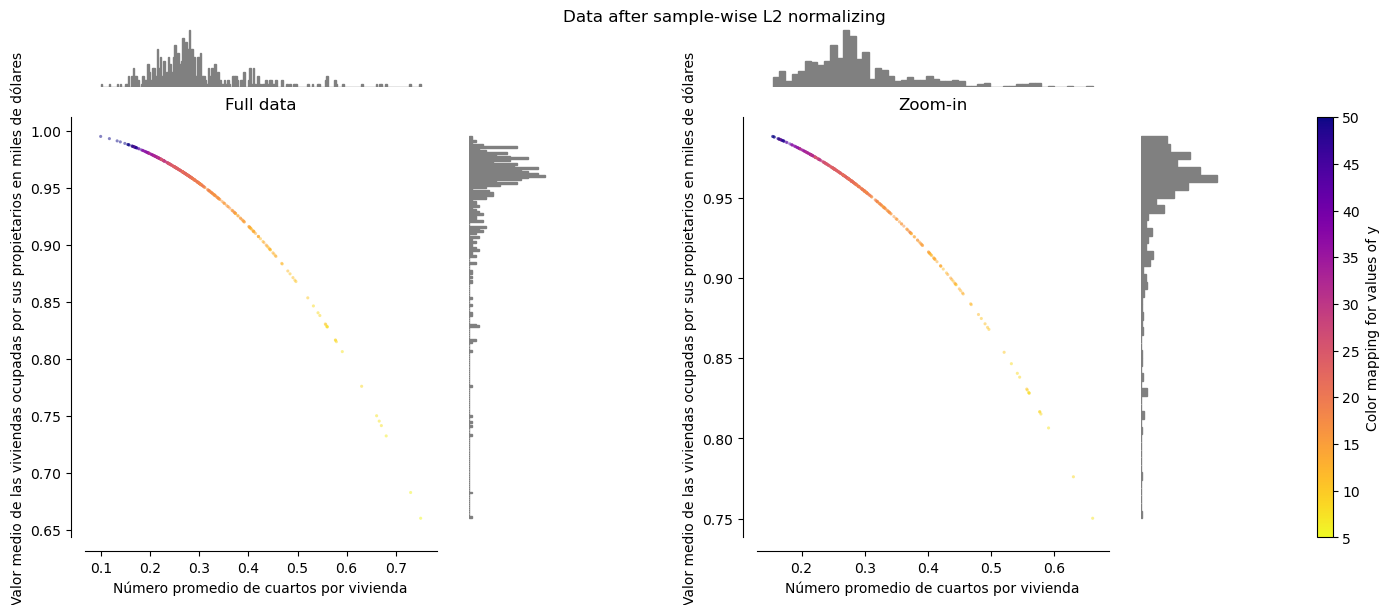

In [7]:
make_plot(9)